In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-05-02 / Aki Taanila


# Lukumäärä- ja prosenttiyhteenvedot

Tämä muistio sisältää likimain kaiken mitä sinun tarvitsee tietää lukumäärien ja prosenttien laskemisesta Pythonin pandas-kirjastoa käyttäen.

In [2]:
# Tuon tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Jos prosentit desimaalilukuina, niin käytän tätä akselin muotoiluun 
myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol=' %')

# Jos prosentit on jo valmiiksi kerrottu sadalla, niin käytän tätä akselin muotoiluun
myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol=' %')

# Grafiikan tyylimääritys
sns.set_style('whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Muuttujien tekstimuotoiset arvot

Muuttujien mahdolliset tektimuotoiset arvot kannattaa tallentaa lista-muuttujiin. Listoja on myöhemmin helppo lisätä tulostaulukoihin.

In [4]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

# Monivalintakysymyksen (mitä etuisuuksia olet käyttänyt?) vaihtoehtojen lista
monivalinnat = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

## crosstab-funktio laskee lukumäärät

**crosstab-funktio** palauttaa dataframen. Voin helposti luoda dataframeen uuden sarakkeen, johon lasken prosentit. 

In [5]:
df1 = pd.crosstab(df['koulutus'], 'f')

# Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus

# Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

# Lisään prosentti-sarakkeen
n = df1['f'].sum()
df1['%'] = df1['f']/n*100

# Säädän desimaalien määrät ja korvaan desimaalipisteen pilkulla
# Tämä ei vaikuta dataframen sisältöön, vaan ainoastaan tässä tulostetun taulukon ulkoasuun
df1.style.format({'f':'{:.0f}', '%':'{:.1f}'})

,f,%
Peruskoulu,27,33.3
2. aste,30,37.0
Korkeakoulu,22,27.2
Ylempi korkeakoulu,2,2.5


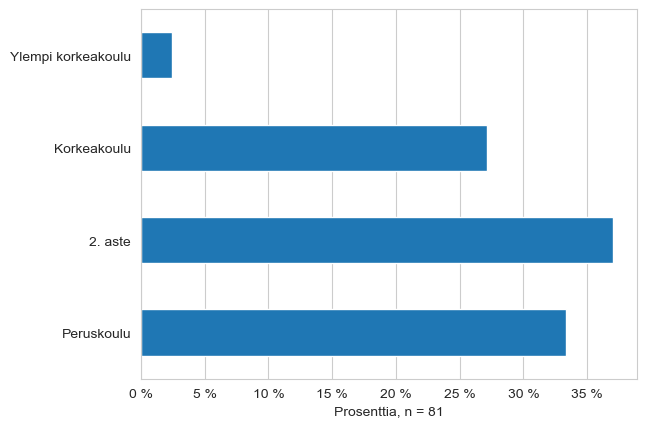

In [6]:
# Vaakapylväskaavio prosenteista
df1['%'].plot.barh()

# x-akselin otsikointi; n-arvo mukaan
plt.xlabel(f'Prosenttia, n = {n}')

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt100)

# Vaakasuuntaisen taustaviivoituksen poisto
plt.grid(axis='y')

## crosstab-funktio laskee ristiintaulukoinnit

In [7]:
# Ristiintaulukointi
df2 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon:
df2.index = koulutus
df2.columns = sukup

df2

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


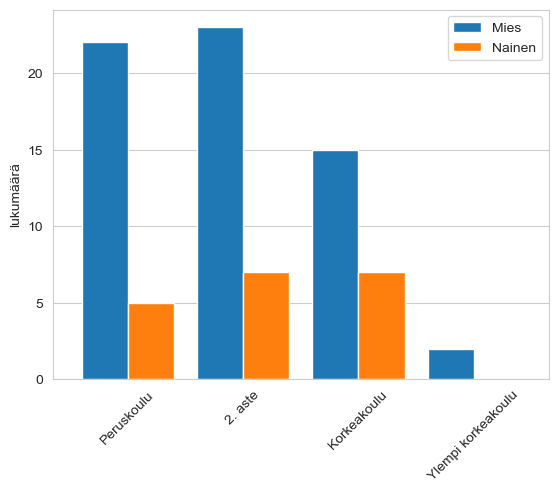

In [8]:
# Lukumäärät pylväinä
df2.plot.bar(width=0.8, rot=45)

plt.ylabel('lukumäärä')

# Pystysuuntaisen taustaviivoituksen poisto
plt.grid(axis='x')

In [9]:
# Ristiintaulukointi, prosentit (normalize) sarakkeiden mukaan
df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns')

# Otsikot kuntoon
df3.index = koulutus
df3.columns = sukup

# Kikkailen n-arvot mukaan
for muuttuja in df3.columns:
    df3 = df3.rename(columns={muuttuja:f'{muuttuja},  n = {df2[muuttuja].sum()}'})

# Loppusilaus
(df3*100).style.format('{:.1f} %')

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


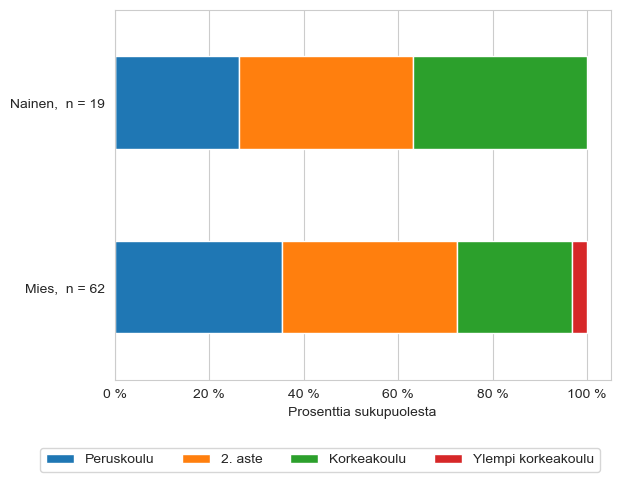

In [10]:
# Edellinen 100 % pinottuina vaakapylväinä, T vaihtaa arvosarjat ja kategoriat päittäin
df3.T.plot.barh(stacked=True)

plt.xlabel('Prosenttia sukupuolesta')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
plt.legend(loc = (-0.15, -0.25), ncol=4)
 
# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Vaakasuuntaisen taustaviivoituksen poisto
plt.grid(axis='y')

## Useiden muuttujien frekvenssit yhteen taulukkoon

Tässä kannattaa käyttää **value_counts**-funktiota.

In [11]:
# Lasken prosentit value_counts()-toiminnolla ja muutan tuloksen dataframeksi
df4 = df['johto'].value_counts(normalize=True).sort_index().to_frame()

# Lisään tietokehikkoon uusia sarakkeita
df4['työtov'] = df['työtov'].value_counts(sort=False, normalize=True)
df4['työymp'] = df['työymp'].value_counts(sort=False, normalize=True)
df4['palkkat'] = df['palkkat'].value_counts(sort=False, normalize=True)
df4['työteht'] = df['työteht'].value_counts(sort=False, normalize=True)

# Riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df4.index = tyytyväisyys

# Yhteensä-rivi
df4.loc['Yhteensä'] = df4.sum()

# Loppusilaus
# na_rep-parametrin ansiosta puuttuva arvo näytetään viivana
(df4 * 100).style.format('{:.1f} %', na_rep='-')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5 %,-,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %
Yhteensä,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %


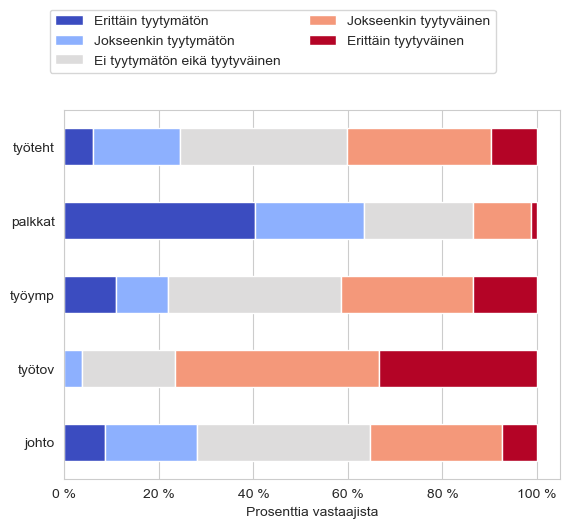

In [12]:
# Edellinen 100 % pylväinä
# cmap-parametrilla voin määrittää käytettävän värikartan
df4.drop('Yhteensä').T.plot.barh(stacked=True, cmap='coolwarm')

plt.xlabel('Prosenttia vastaajista')

# Selitteen sijainti; 2 selitettä vierekkäin
plt.legend(loc=(-0.03, 1.1), ncol=2)

# x-akselin jakoviivojen otsikoiden muotoilu
plt.gca().xaxis.set_major_formatter(myFmt1)

# Vaakasuuntaisen taustaviivoituksen poisto
plt.grid(axis='y')

Värikarttoja https://matplotlib.org/stable/tutorials/colors/colormaps.html

Matplotlib mahdollistaa monenlaisia toteutuksia. Seuraavassa laadin viiden kaavion yhdistelmän

- parametrilla **subplots=True** määritän, että jokaisesta sarakkeesta oma kaavio
- parametrilla **layout=(1, 5)** määritän, että kaaviot sijoitetaan 1 riville, 5 rinnakkain
- parametreilla **sharex=True, sharey=True** määritän, että kaikilla kaavioilla on yhteiset akselit
- parametrilla **figsize=(12, 2)** määritän kuvion koon
- parametrilla **legend=False** jätän kaavioista selitteet pois

Text(0.08, 0.5, '%')

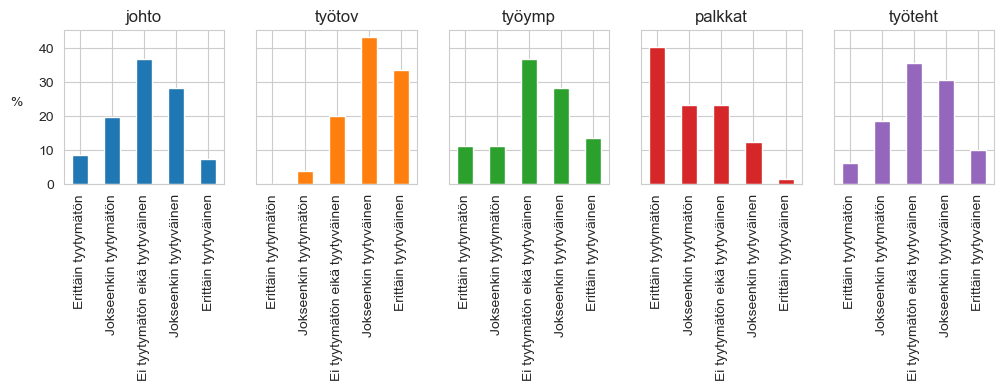

In [13]:
(df4.drop('Yhteensä')*100).plot.bar(subplots=True, layout=(1, 5), sharex=True, sharey=True, 
              figsize=(12, 2), legend=False)

# Kuvio, jonka sisällä kaaviot sijaitsevat (gcf = get current figure)
fig = plt.gcf()

# %-merkki kuvion sijaintiin (0.08, 0.5)
fig.text(0.08, 0.5, '%')

## sum-funktio laskee monivalintojen yhteenvedot

Jos monivalinta-muuttujissa valinnan puuttuminen näkyy puuttuvana arvona ja valinta merkitään numerolla 1, niin valintojen lukumäärän voi laskea count-funktiolla tai sum-funktiolla. Jos valinnan puuttuminen merkitään numerolla 0, niin valintojen lukumäärä täytyy laskea sum-funktiolla.

In [14]:
# Monivalintojen lukumäärät
df5 = df[monivalinnat].sum()

# Muutan series-tyyppisen tietorakenteen dataframeksi (to_frame) ja järjestän lukumäärien mukaiseen järjestykseen (sort_values)
df5 = df5.to_frame('f').sort_values(by='f', ascending=False)

df5.style.format('{:.0f}')

,f
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


In [15]:
# Prosenttia vastaajien kokonaismäärästä (shape[0])
df5['% vastaajista'] = df5['f']/df.shape[0]*100

# Ulkoasun viimeistely
df5.style.format({'f':'{:.0f}', '% vastaajista':'{:.1f} %'})

,f,% vastaajista
työterv,47,57.3 %
hieroja,22,26.8 %
lomaosa,20,24.4 %
kuntosa,9,11.0 %


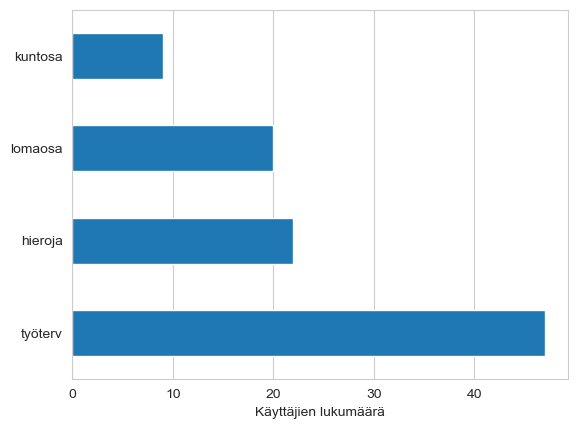

In [16]:
# Lukumäärät pylväinä
df5['f'].plot.barh(legend=False)

plt.xlabel('Käyttäjien lukumäärä')

# Vaakasuuntaisen taustaviivoituksen poisto
plt.grid(axis='y')

In [17]:
# Miesten ja naisten lukumäärät
miehet_n = len(df[df['sukup']==1])
naiset_n = len(df[df['sukup']==2])

# Miesten ja naisten otsikoinnit
miehet = f'Miehet, n = {miehet_n}'
naiset = f'Naiset, n = {naiset_n}'

# Monivalinnat sukupuolen mukaan
df6 = df.groupby('sukup')[monivalinnat].sum()

# Sukupuolet sukup-listasta, jonka määrittelin aiemmin
df6.index = [miehet, naiset]

df6.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
"Miehet, n = 63",35,16,8,13
"Naiset, n = 19",12,4,1,9


Text(0, 0.5, 'Lukumäärä')

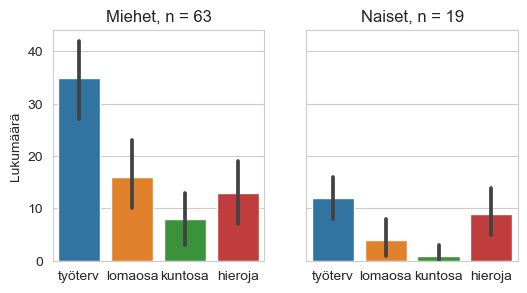

In [18]:
# Luodaan kahden kaavion kuvio
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 3))

# fillna(0) korvaa puuttuvat arvot nollilla
sns.barplot(data=df[monivalinnat].fillna(0)[df['sukup']==1], ax=axs[0], estimator=sum)
sns.barplot(data=df[monivalinnat].fillna(0)[df['sukup']==2], ax=axs[1], estimator=sum)

axs[0].set_title(miehet)
axs[1].set_title(naiset)
axs[0].set_ylabel('Lukumäärä')

In [19]:
# Monivalinnat sukupuolen mukaan
df7 = df.groupby('sukup')[monivalinnat].sum()

# Prosentit
# iloc[0] viittaa indeksin mukaiselle 0-riville (miesten rivi)
df7.iloc[0] = df7.iloc[0] / miehet_n * 100
df7.iloc[1] = df7.iloc[1] / naiset_n * 100

# Kikkailen n-arvot mukaan
df7.index = [miehet, naiset]

# Loppusilaus
(df7).style.format('{:.1f} %')

,työterv,lomaosa,kuntosa,hieroja
"Miehet, n = 63",55.6 %,25.4 %,12.7 %,20.6 %
"Naiset, n = 19",63.2 %,21.1 %,5.3 %,47.4 %


## Luokiteltu jakauma

Pandas-kirjaston **cut**-toiminnolla voin luokitella muuttujan. Oletuksena luokan yläraja kuuluu luokkaan. Parametrilla **right = False** voin vaihtaa luokan alarajan kuulumaan luokkaan (histogrammi-kaaviossa käytetään tätä tapaa).

In [20]:
# Määrittelen luokkarajat palkan luokittelemiseksi
rajat = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins=rajat, right=False)

# Palkkaluokkiin kuuluvien lukumäärät
df8 = pd.crosstab(df['palkkaluokka'], 'f')
df8.columns.name = ''

# Prosentit
df8['%'] = df8['f']/df8['f'].sum()*100

df8.loc['Yhteensä'] = df8.sum()

# Loppusilaus
df8.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
palkkaluokka,,
"[1000, 2000)",19,23.2 %
"[2000, 3000)",50,61.0 %
"[3000, 4000)",8,9.8 %
"[4000, 7000)",5,6.1 %
Yhteensä,82,100.0 %


Text(0, 0.5, 'lukumäärä')

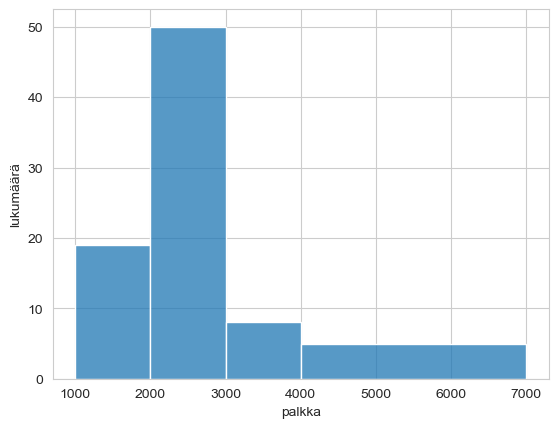

In [21]:
# Luokiteltu jakauma histogrammina
sns.histplot(data=df['palkka'], bins=rajat)

plt.ylabel('lukumäärä')

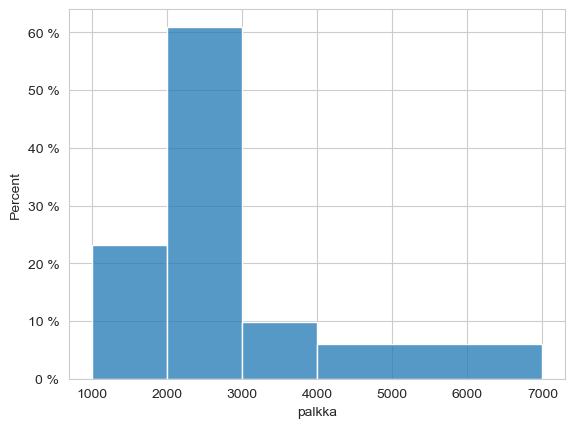

In [22]:
# Luokiteltu jakauma histogrammina, jossa pystyakselilla prosentit
sns.histplot(data=df['palkka'], bins=rajat, stat='percent')

# y-akselin jakoviivojen otsikoiden muotoilu
plt.gca().yaxis.set_major_formatter(myFmt100)

**histplot**-toiminnolla tehdyssä histogrammissa pylvään leveys riippuu oikeaoppisesti luokkavälin pituudesta (tässä luokkaan (4000, 7000] liittyvä pylväs on muita leveämpi.

## Lisätietoa

Data-analytiikka Pythonilla https://tilastoapu.wordpress.com/python/